In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [8]:
X1  = pd.read_csv('dump1.position',header=None)
X2  = pd.read_csv('dump2.position',header=None)
X3  = pd.read_csv('dump3.position',header=None)
X4  = pd.read_csv('dump4.position',header=None)
X5  = pd.read_csv('dump5.position',header=None)

In [9]:
X1.head(30)

,0
0,ITEM: TIMESTEP
1,0
2,ITEM: NUMBER OF ATOMS
3,15
4,ITEM: BOX BOUNDS ff fm pp
5,-4.1000000000000000e+01 4.1000000000000000e+01
6,0.0000000000000000e+00 2.0000000000000000e+02
7,-2.5000000000000000e-01 2.5000000000000000e-01
8,ITEM: ATOMS id type x y
9,42473 2 -22 136.536


In [10]:
atom_id,_,x,y = map(float,X1.iloc[9][0].strip().split())

In [11]:
atom_id,x,y

(42473.0, -22.0, 136.536)

In [12]:
X1.shape[0]

1728

In [13]:
# Creating df
df1 = {}
df2 = {}
df3 = {}
df4 = {}
df5 = {}
for i in range(42463,42538,1):
    if 42463<=i<42463+15:
        df1[i] = {}
    elif 42463+15<=i<42463+30:
        df2[i] = {}
    elif 42463+30<=i<42463+45:
        df3[i] = {}
    elif 42463+45<=i<42463+60:
        df4[i] = {}
    elif 42463+60<=i<42463+75:
        df5[i] = {}
    
for i in range(0,X1.shape[0],24):
    time = int(X1.iloc[i+1][0])*(0.00005)
    for j in range(i+9,i+24):
        sphere_id,_,x,y = map(float, X1.iloc[j][0].strip().split())
        df1[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X2.iloc[j][0].strip().split())
        df2[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X3.iloc[j][0].strip().split())
        df3[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X4.iloc[j][0].strip().split())
        df4[int(sphere_id)][time] = [x,y]
    
        sphere_id,_,x,y = map(float, X5.iloc[j][0].strip().split())
        df5[int(sphere_id)][time] = [x,y]
        
data1 = pd.DataFrame(df1)
data1.index.name = 'Time'

data2 = pd.DataFrame(df2)
data2.index.name = 'Time'

data3 = pd.DataFrame(df3)
data3.index.name = 'Time'

data4 = pd.DataFrame(df4)
data4.index.name = 'Time'

data5 = pd.DataFrame(df5)
data5.index.name = 'Time'

In [14]:
data4

,42508,42509,42510,42511,42512,42513,42514,42515,42516,42517,42518,42519,42520,42521,42522
Time,,,,,,,,,,,,,,,
0.0,"[10.0, 140.0]","[9.5, 139.134]","[10.5, 139.134]","[9.0, 138.268]","[10.0, 138.268]","[11.0, 138.268]","[8.5, 137.402]","[9.5, 137.402]","[10.5, 137.402]","[11.5, 137.402]","[8.0, 136.536]","[9.0, 136.536]","[10.0, 136.536]","[11.0, 136.536]","[12.0, 136.536]"
0.5,"[10.0, 139.875]","[9.5, 139.009]","[10.5, 139.009]","[9.0, 138.143]","[10.0, 138.143]","[11.0, 138.143]","[8.5, 137.277]","[9.5, 137.277]","[10.5, 137.277]","[11.5, 137.277]","[8.0, 136.411]","[9.0, 136.411]","[10.0, 136.411]","[11.0, 136.411]","[12.0, 136.411]"
1.0,"[10.0, 139.5]","[9.5, 138.634]","[10.5, 138.634]","[9.0, 137.768]","[10.0, 137.768]","[11.0, 137.768]","[8.5, 136.902]","[9.5, 136.902]","[10.5, 136.902]","[11.5, 136.902]","[8.0, 136.036]","[9.0, 136.036]","[10.0, 136.036]","[11.0, 136.036]","[12.0, 136.036]"
1.5,"[10.0, 138.875]","[9.5, 138.009]","[10.5, 138.009]","[9.0, 137.143]","[10.0, 137.143]","[11.0, 137.143]","[8.5, 136.277]","[9.5, 136.277]","[10.5, 136.277]","[11.5, 136.277]","[8.0, 135.411]","[9.0, 135.411]","[10.0, 135.411]","[11.0, 135.411]","[12.0, 135.411]"
2.0,"[10.0, 138.0]","[9.5, 137.134]","[10.5, 137.134]","[9.0, 136.268]","[10.0, 136.268]","[11.0, 136.268]","[8.5, 135.402]","[9.5, 135.402]","[10.5, 135.402]","[11.5, 135.402]","[8.0, 134.536]","[9.0, 134.536]","[10.0, 134.536]","[11.0, 134.536]","[12.0, 134.536]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33.5,"[19.9877, 4.97613]","[20.4021, 5.88622]","[19.4067, 5.79002]","[20.8165, 6.7963]","[19.8211, 6.7001]","[18.8258, 6.6039]","[21.2309, 7.70638]","[20.2355, 7.61018]","[19.2401, 7.51399]","[18.2448, 7.41779]","[21.6452, 8.61646]","[20.6499, 8.52027]","[19.6545, 8.42407]","[18.6591, 8.32787]","[17.6638, 8.23167]"
34.0,"[19.9931, 4.97571]","[20.4052, 5.88683]","[19.4101, 5.78814]","[20.8173, 6.79795]","[19.8222, 6.69926]","[18.8271, 6.60057]","[21.2294, 7.70906]","[20.2343, 7.61037]","[19.2392, 7.51168]","[18.244, 7.41299]","[21.6415, 8.62018]","[20.6464, 8.52149]","[19.6513, 8.4228]","[18.6561, 8.32411]","[17.661, 8.22542]"
34.5,"[19.9971, 4.97544]","[20.4113, 5.8856]","[19.416, 5.78923]","[20.8255, 6.79575]","[19.8302, 6.69938]","[18.8348, 6.60301]","[21.2397, 7.70591]","[20.2444, 7.60954]","[19.2491, 7.51316]","[18.2537, 7.41679]","[21.654, 8.61606]","[20.6586, 8.51969]","[19.6633, 8.42332]","[18.6679, 8.32695]","[17.6726, 8.23058]"


In [15]:
time_Arr = []
x_Arr1 = []
y_Arr1 = []

x_Arr2 = []
y_Arr2 = []

x_Arr3 = []
y_Arr3 = []

x_Arr4 = []
y_Arr4 = []

x_Arr5 = []
y_Arr5 = []
for i in data1.index:
    instance1  = data1.loc[i]
    instance2  = data2.loc[i]
    instance3  = data3.loc[i]
    instance4  = data4.loc[i]
    instance5  = data5.loc[i]
    time_Arr.append(i)
    
    center_x = (instance1[42463][0]+instance1[42473][0]+instance1[42477][0])/3
    x_Arr1.append(center_x)
    center_y = (instance1[42463][1]+instance1[42473][1]+instance1[42477][1])/3
    y_Arr1.append(center_y)
    
    center_x = (instance2[42463+15][0]+instance2[42473+15][0]+instance2[42477+15][0])/3
    x_Arr2.append(center_x)
    center_y = (instance2[42463+15][1]+instance2[42473+15][1]+instance2[42477+15][1])/3
    y_Arr2.append(center_y)
    
    center_x = (instance3[42463+30][0]+instance3[42473+30][0]+instance3[42477+30][0])/3
    x_Arr3.append(center_x)
    center_y = (instance3[42463+30][1]+instance3[42473+30][1]+instance3[42477+30][1])/3
    y_Arr3.append(center_y)
    
    center_x = (instance4[42463+45][0]+instance4[42473+45][0]+instance4[42477+45][0])/3
    x_Arr4.append(center_x)
    center_y = (instance4[42463+45][1]+instance4[42473+45][1]+instance4[42477+45][1])/3
    y_Arr4.append(center_y)
    
    center_x = (instance5[42463+60][0]+instance5[42473+60][0]+instance5[42477+60][0])/3
    x_Arr5.append(center_x)
    center_y = (instance5[42463+60][1]+instance5[42473+60][1]+instance5[42477+60][1])/3
    y_Arr5.append(center_y)


centroid_df1 =pd.DataFrame({"time":time_Arr,"x":x_Arr1,"y":y_Arr1})
centroid_df2 =pd.DataFrame({"time":time_Arr,"x":x_Arr2,"y":y_Arr2})
centroid_df3 =pd.DataFrame({"time":time_Arr,"x":x_Arr3,"y":y_Arr3})
centroid_df4 =pd.DataFrame({"time":time_Arr,"x":x_Arr4,"y":y_Arr4})
centroid_df5 =pd.DataFrame({"time":time_Arr,"x":x_Arr5,"y":y_Arr5})

In [16]:
centroid_df5

,time,x,y
0,0.0,20.000000,137.690667
1,0.5,20.000000,137.565667
2,1.0,20.000000,137.190667
3,1.5,20.000000,136.565667
4,2.0,20.000000,135.690667
...,...,...,...
67,33.5,31.704000,6.341847
68,34.0,31.720033,6.332907
69,34.5,31.722267,6.341353
70,35.0,31.714367,6.333870


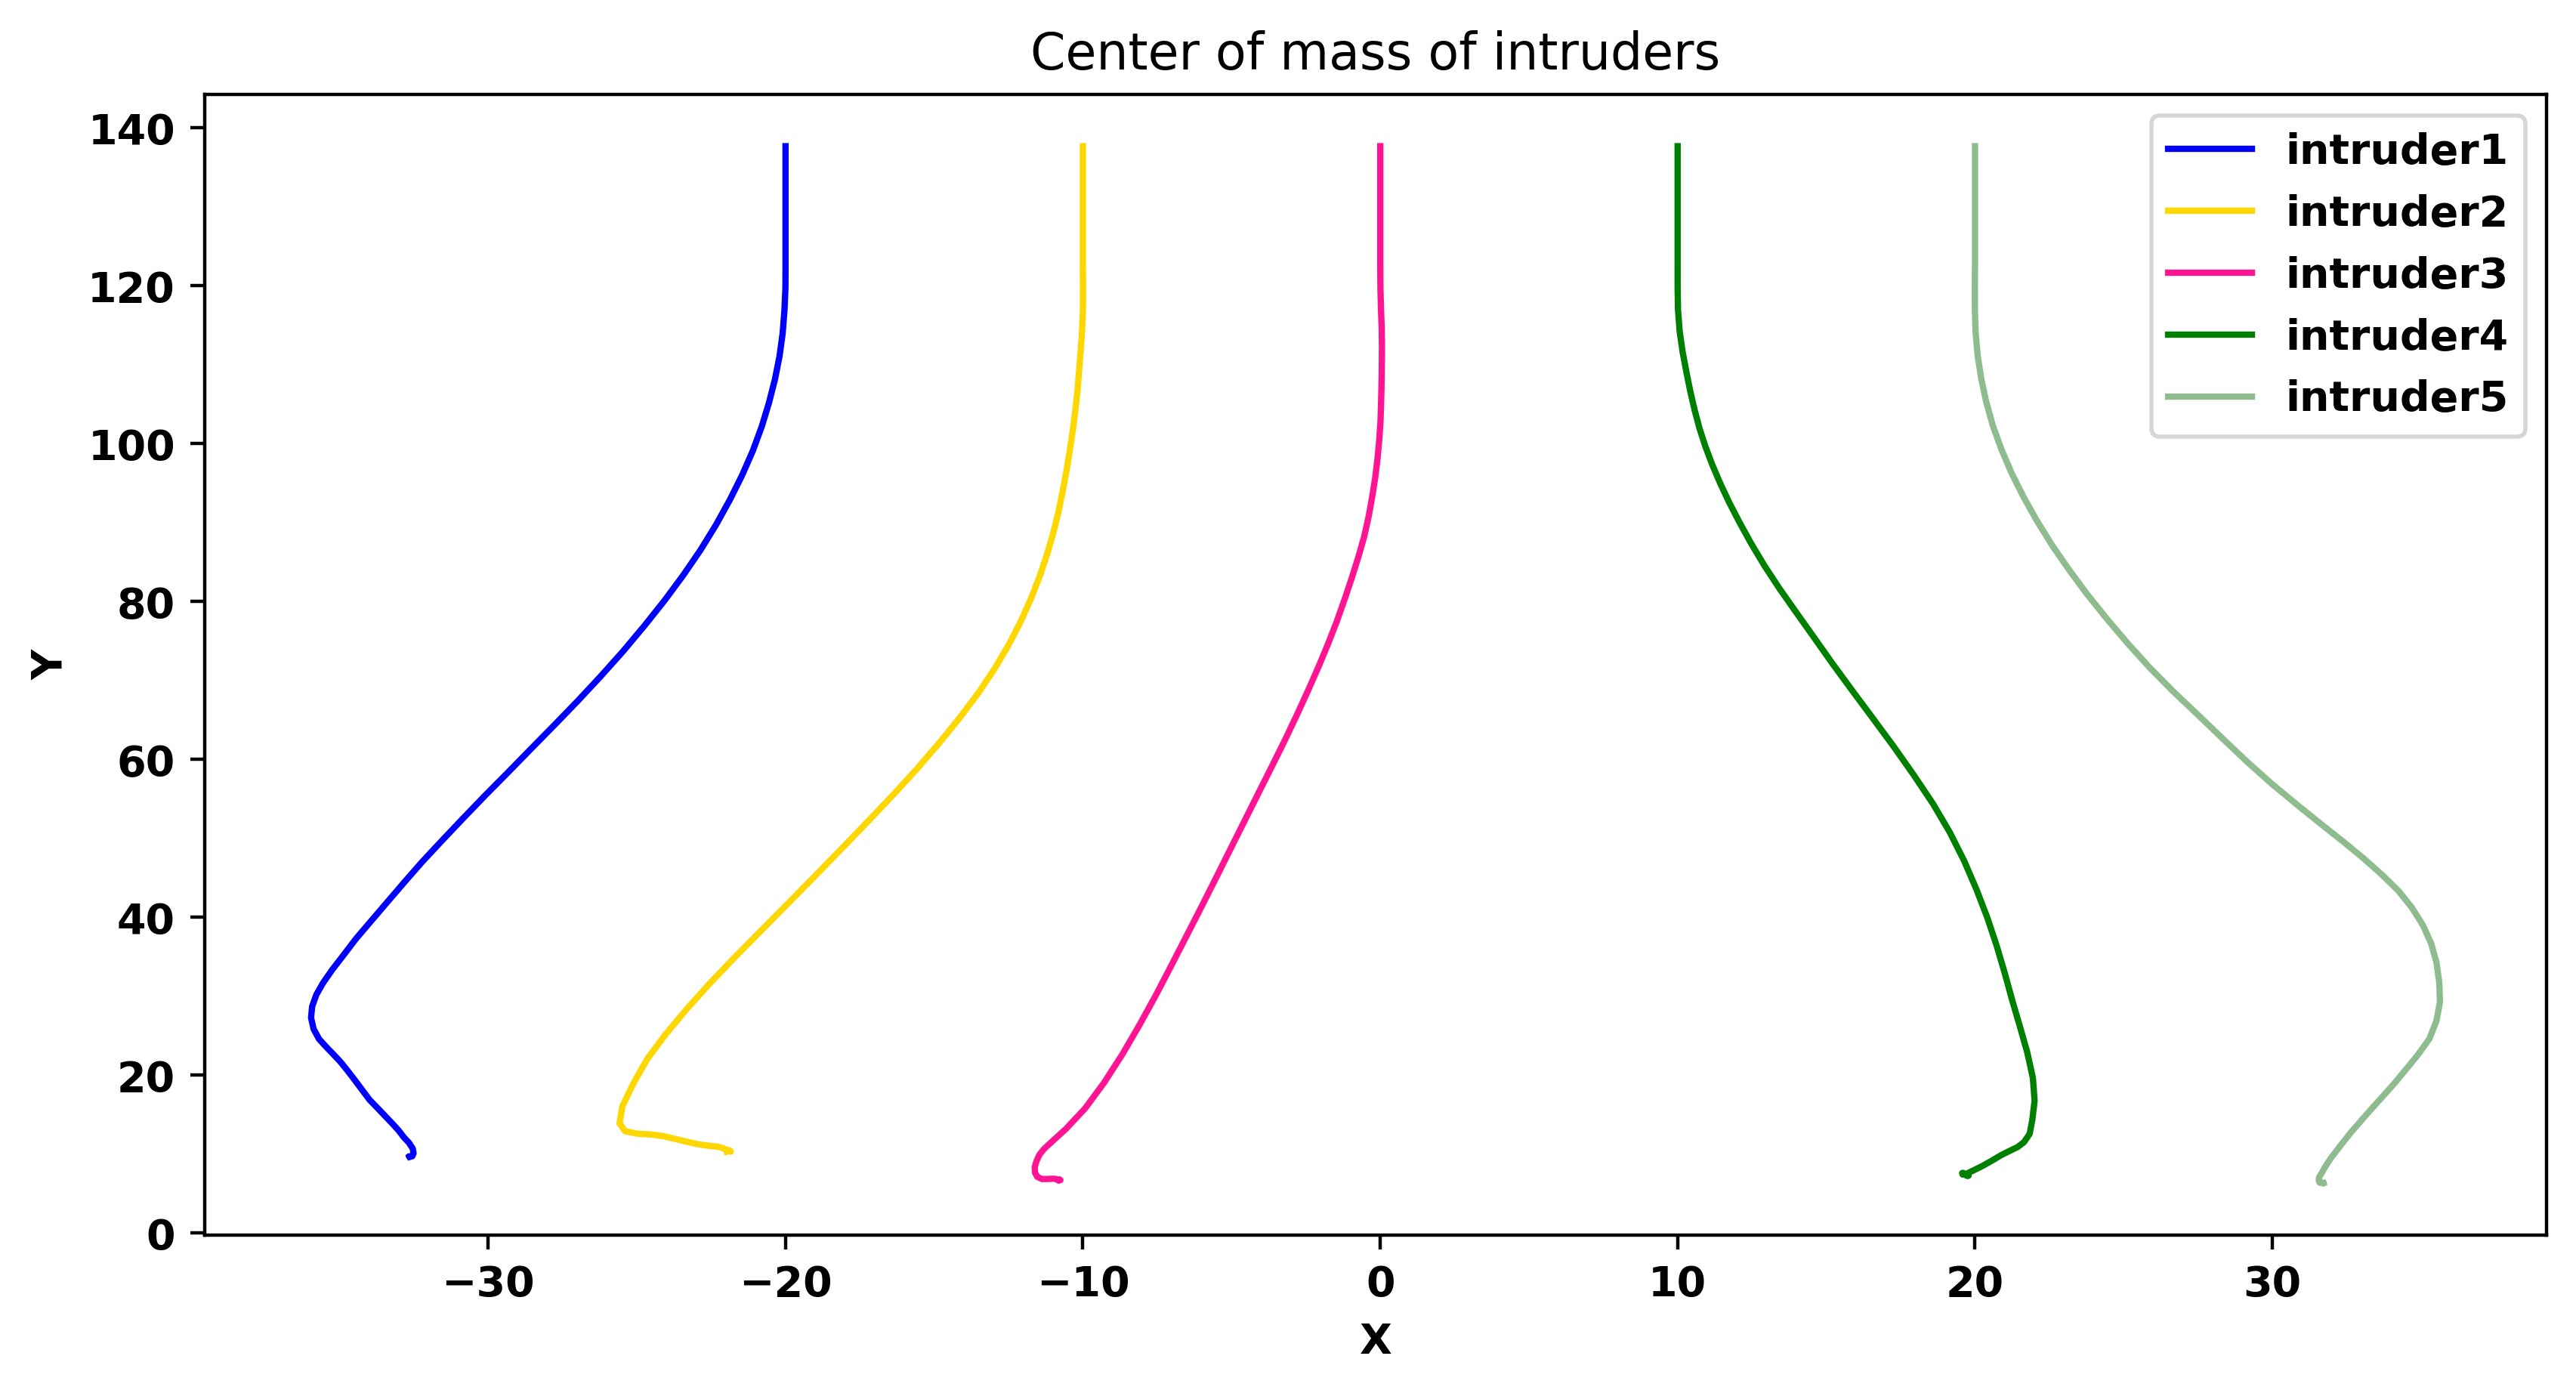

In [17]:
# y Vs x
plt.figure(figsize=(10,5),dpi=400)
plt.plot(x_Arr1,y_Arr1,label='intruder1',color='blue')
plt.plot(x_Arr2,y_Arr2,label='intruder2',color='gold')
plt.plot(x_Arr3,y_Arr3,label='intruder3',color='deeppink')
plt.plot(x_Arr4,y_Arr4,label='intruder4',color='green')
plt.plot(x_Arr5,y_Arr5,label='intruder5',color='darkseagreen')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.title('Center of mass of intruders')
plt.savefig('intruder y Vs x.svg',bbox_inches='tight')
plt.show()

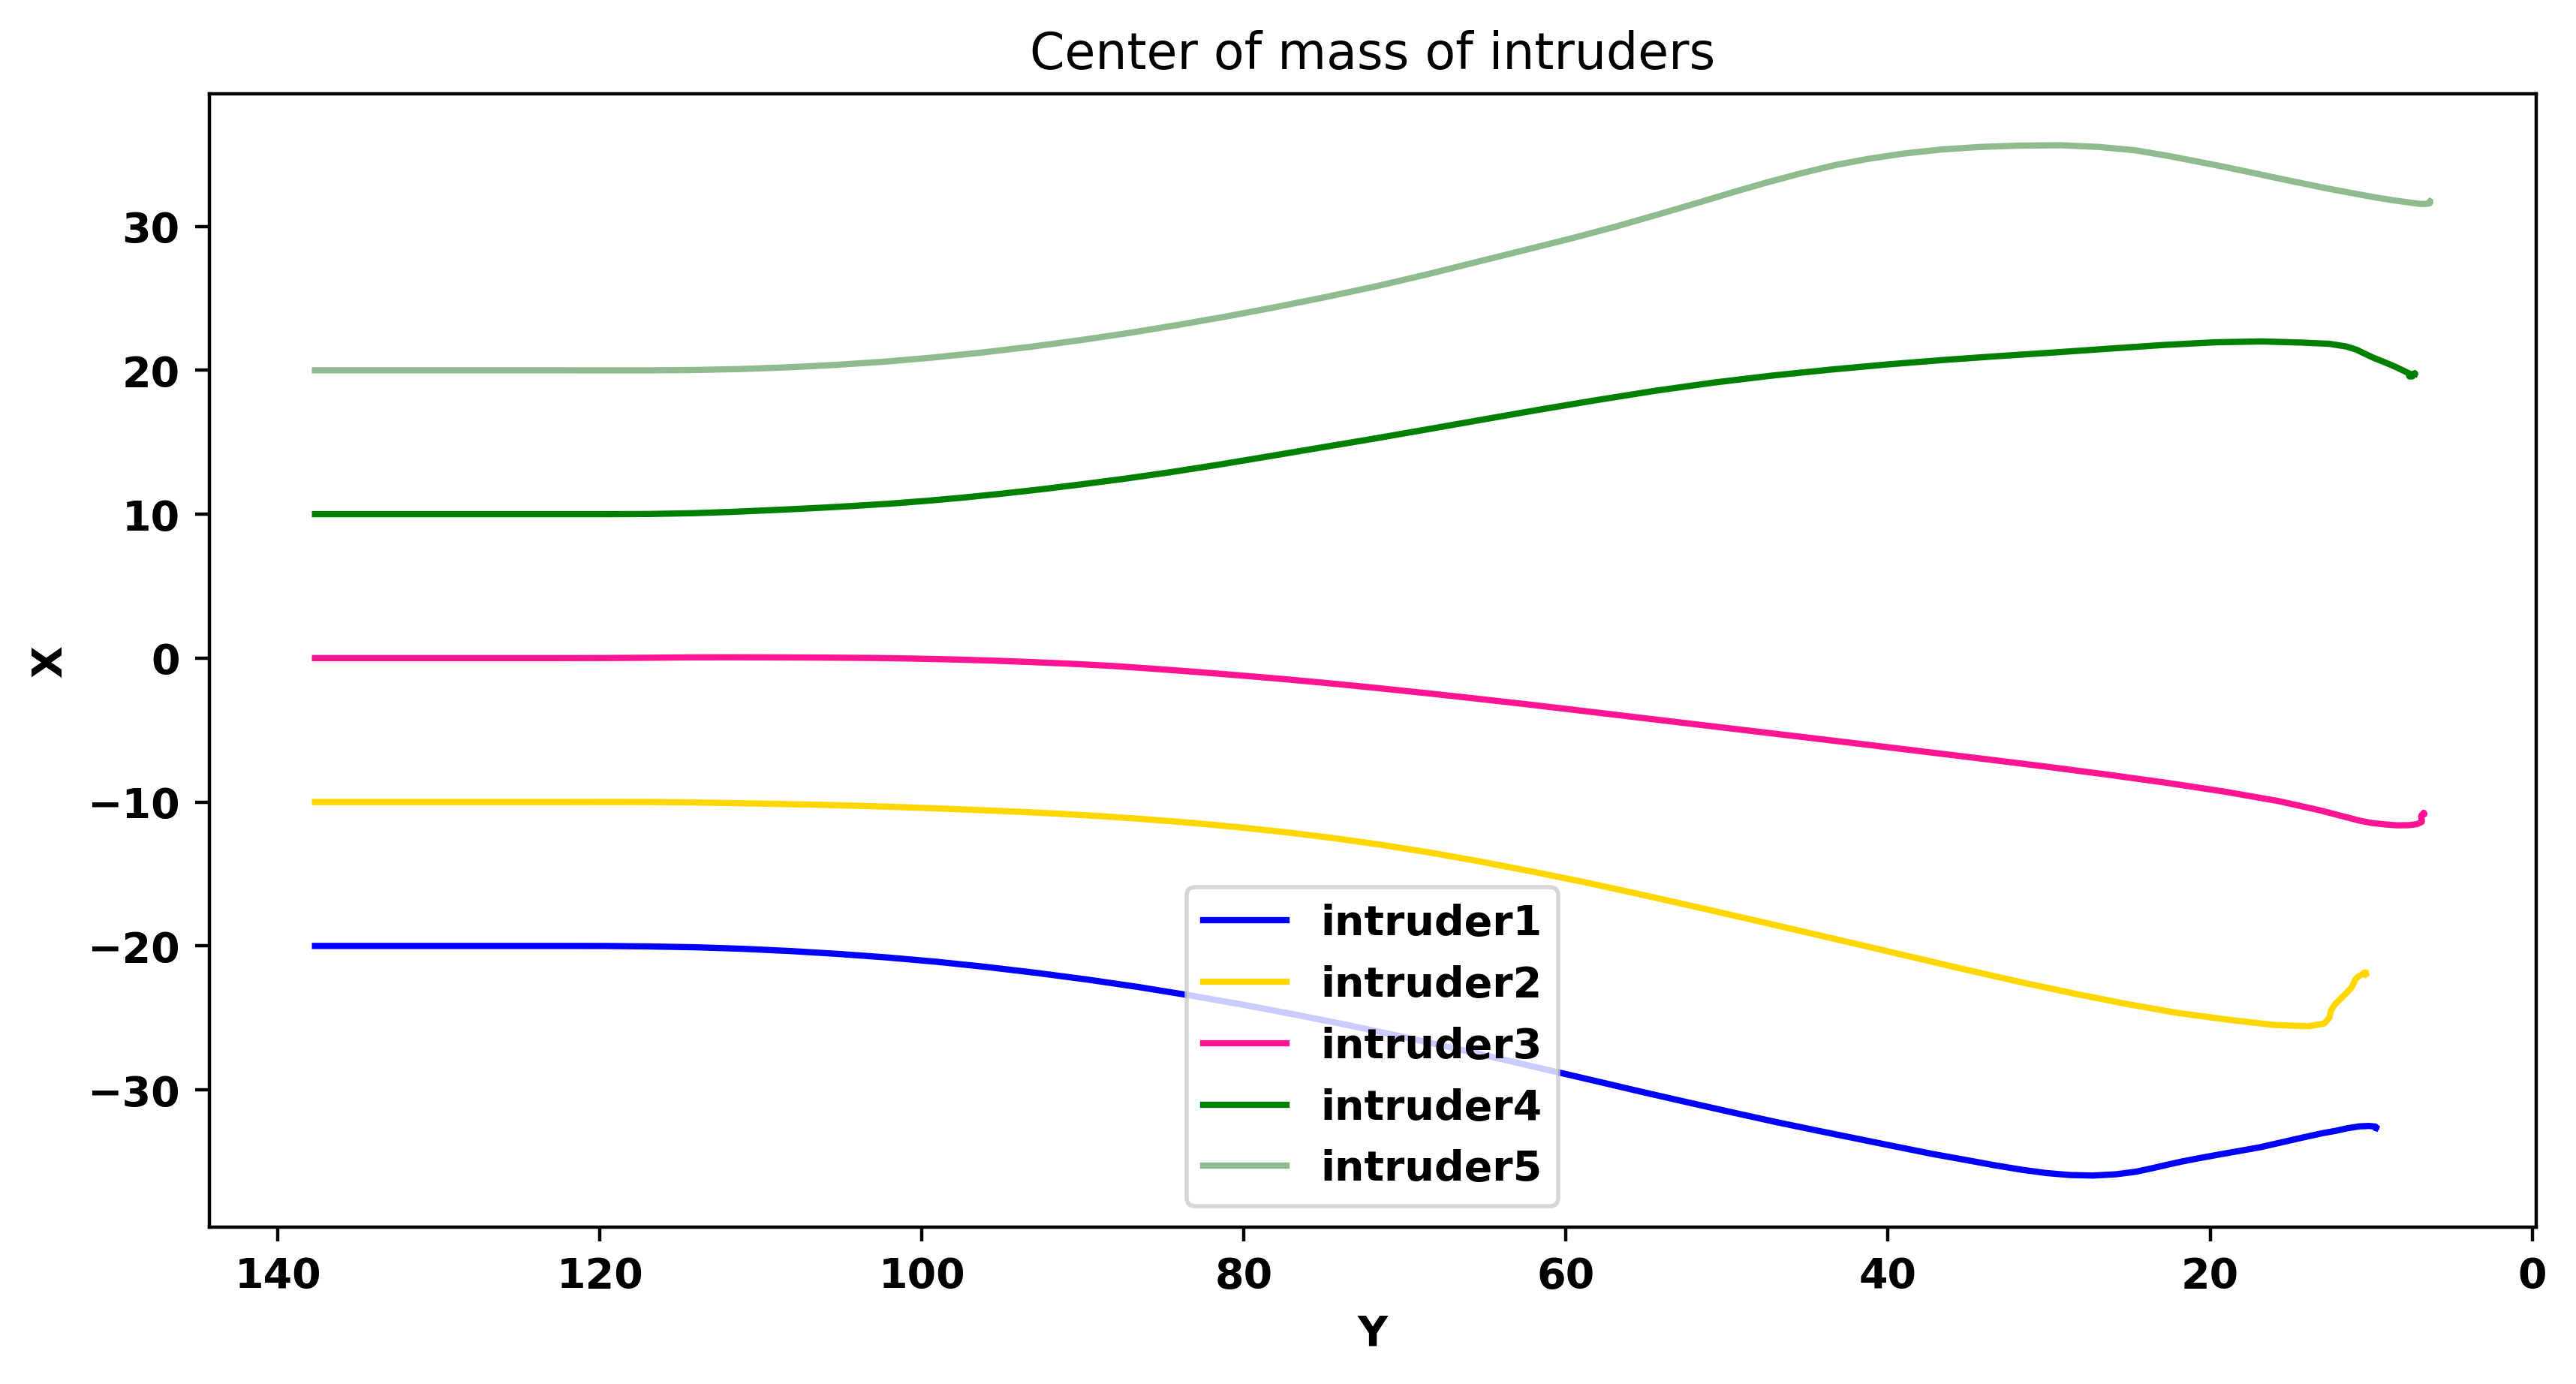

In [18]:
# x Vs y
plt.figure(figsize=(10,5),dpi=400)
plt.gca().invert_xaxis()
plt.plot(y_Arr1,x_Arr1,label='intruder1',color='blue')
plt.plot(y_Arr2,x_Arr2,label='intruder2',color='gold')
plt.plot(y_Arr3,x_Arr3,label='intruder3',color='deeppink')
plt.plot(y_Arr4,x_Arr4,label='intruder4',color='green')
plt.plot(y_Arr5,x_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.title('Center of mass of intruders')
plt.savefig('intruder x Vs y.svg',bbox_inches='tight')
plt.show()

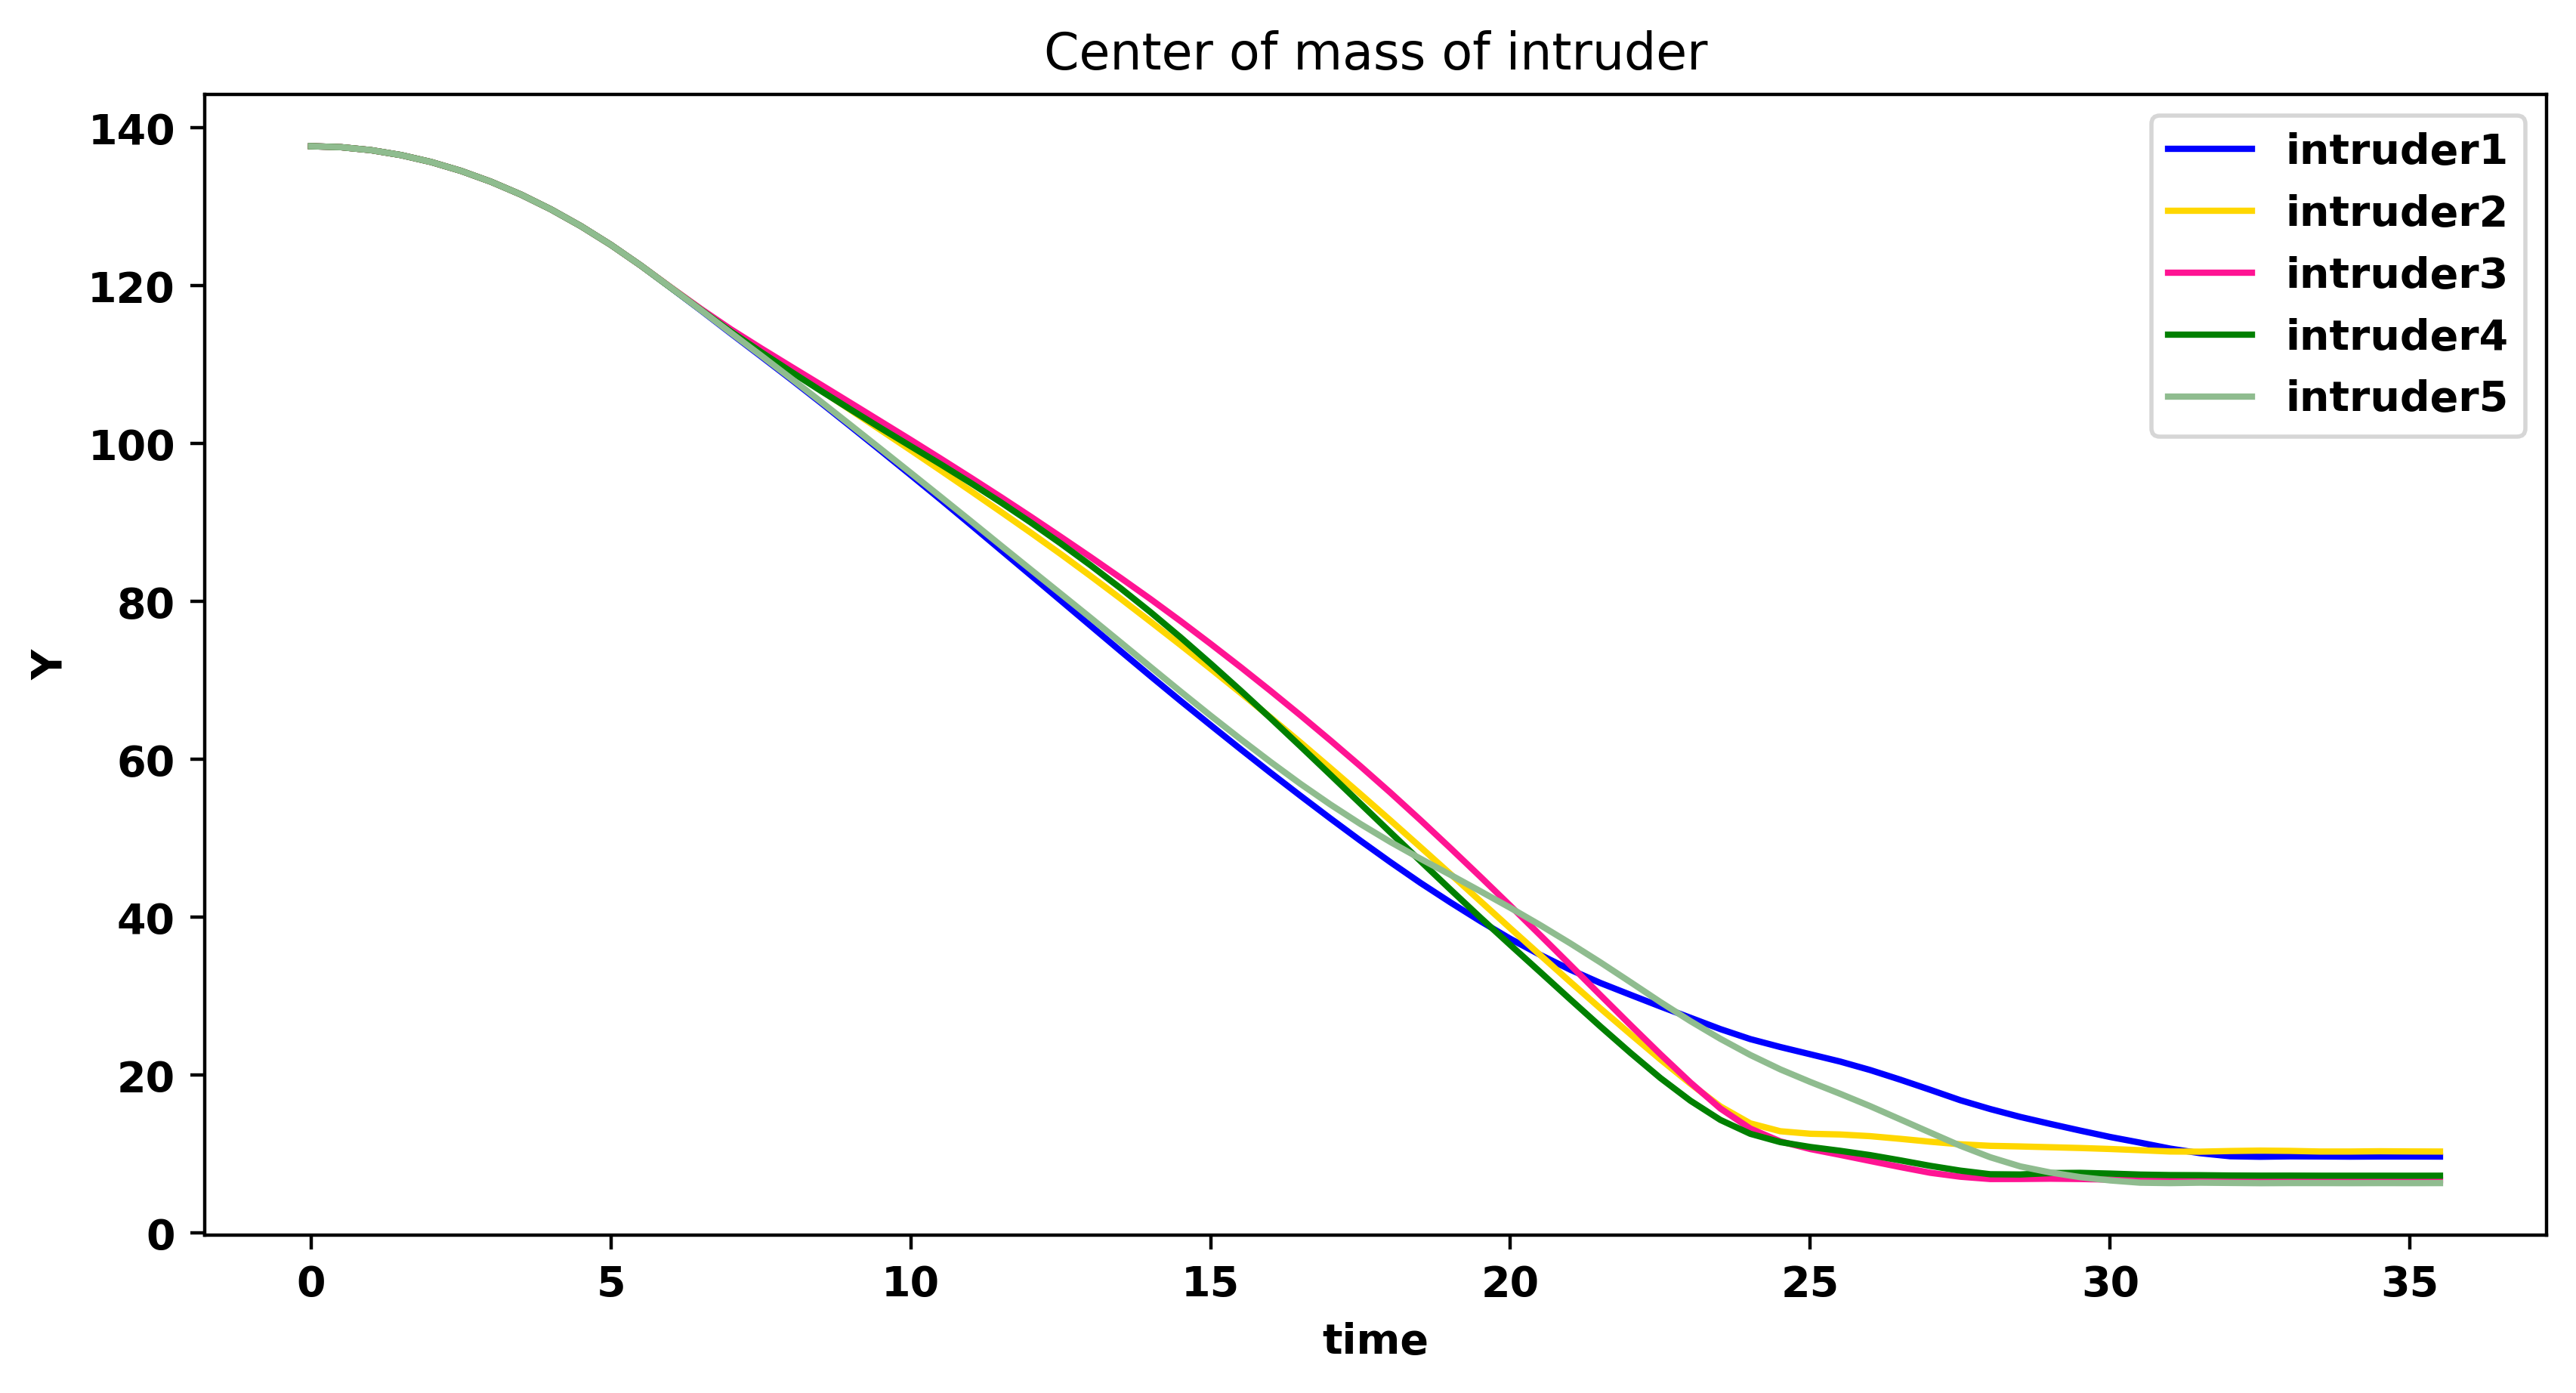

In [19]:
# y Vs time
plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,y_Arr1,label='intruder1',color='blue')
plt.plot(time_Arr,y_Arr2,label='intruder2',color='gold')
plt.plot(time_Arr,y_Arr3,label='intruder3',color='deeppink')
plt.plot(time_Arr,y_Arr4,label='intruder4',color='green')
plt.plot(time_Arr,y_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('Y')
plt.legend()
plt.title('Center of mass of intruder')
plt.savefig('intruder y Vs time.svg',bbox_inches='tight')
plt.show()

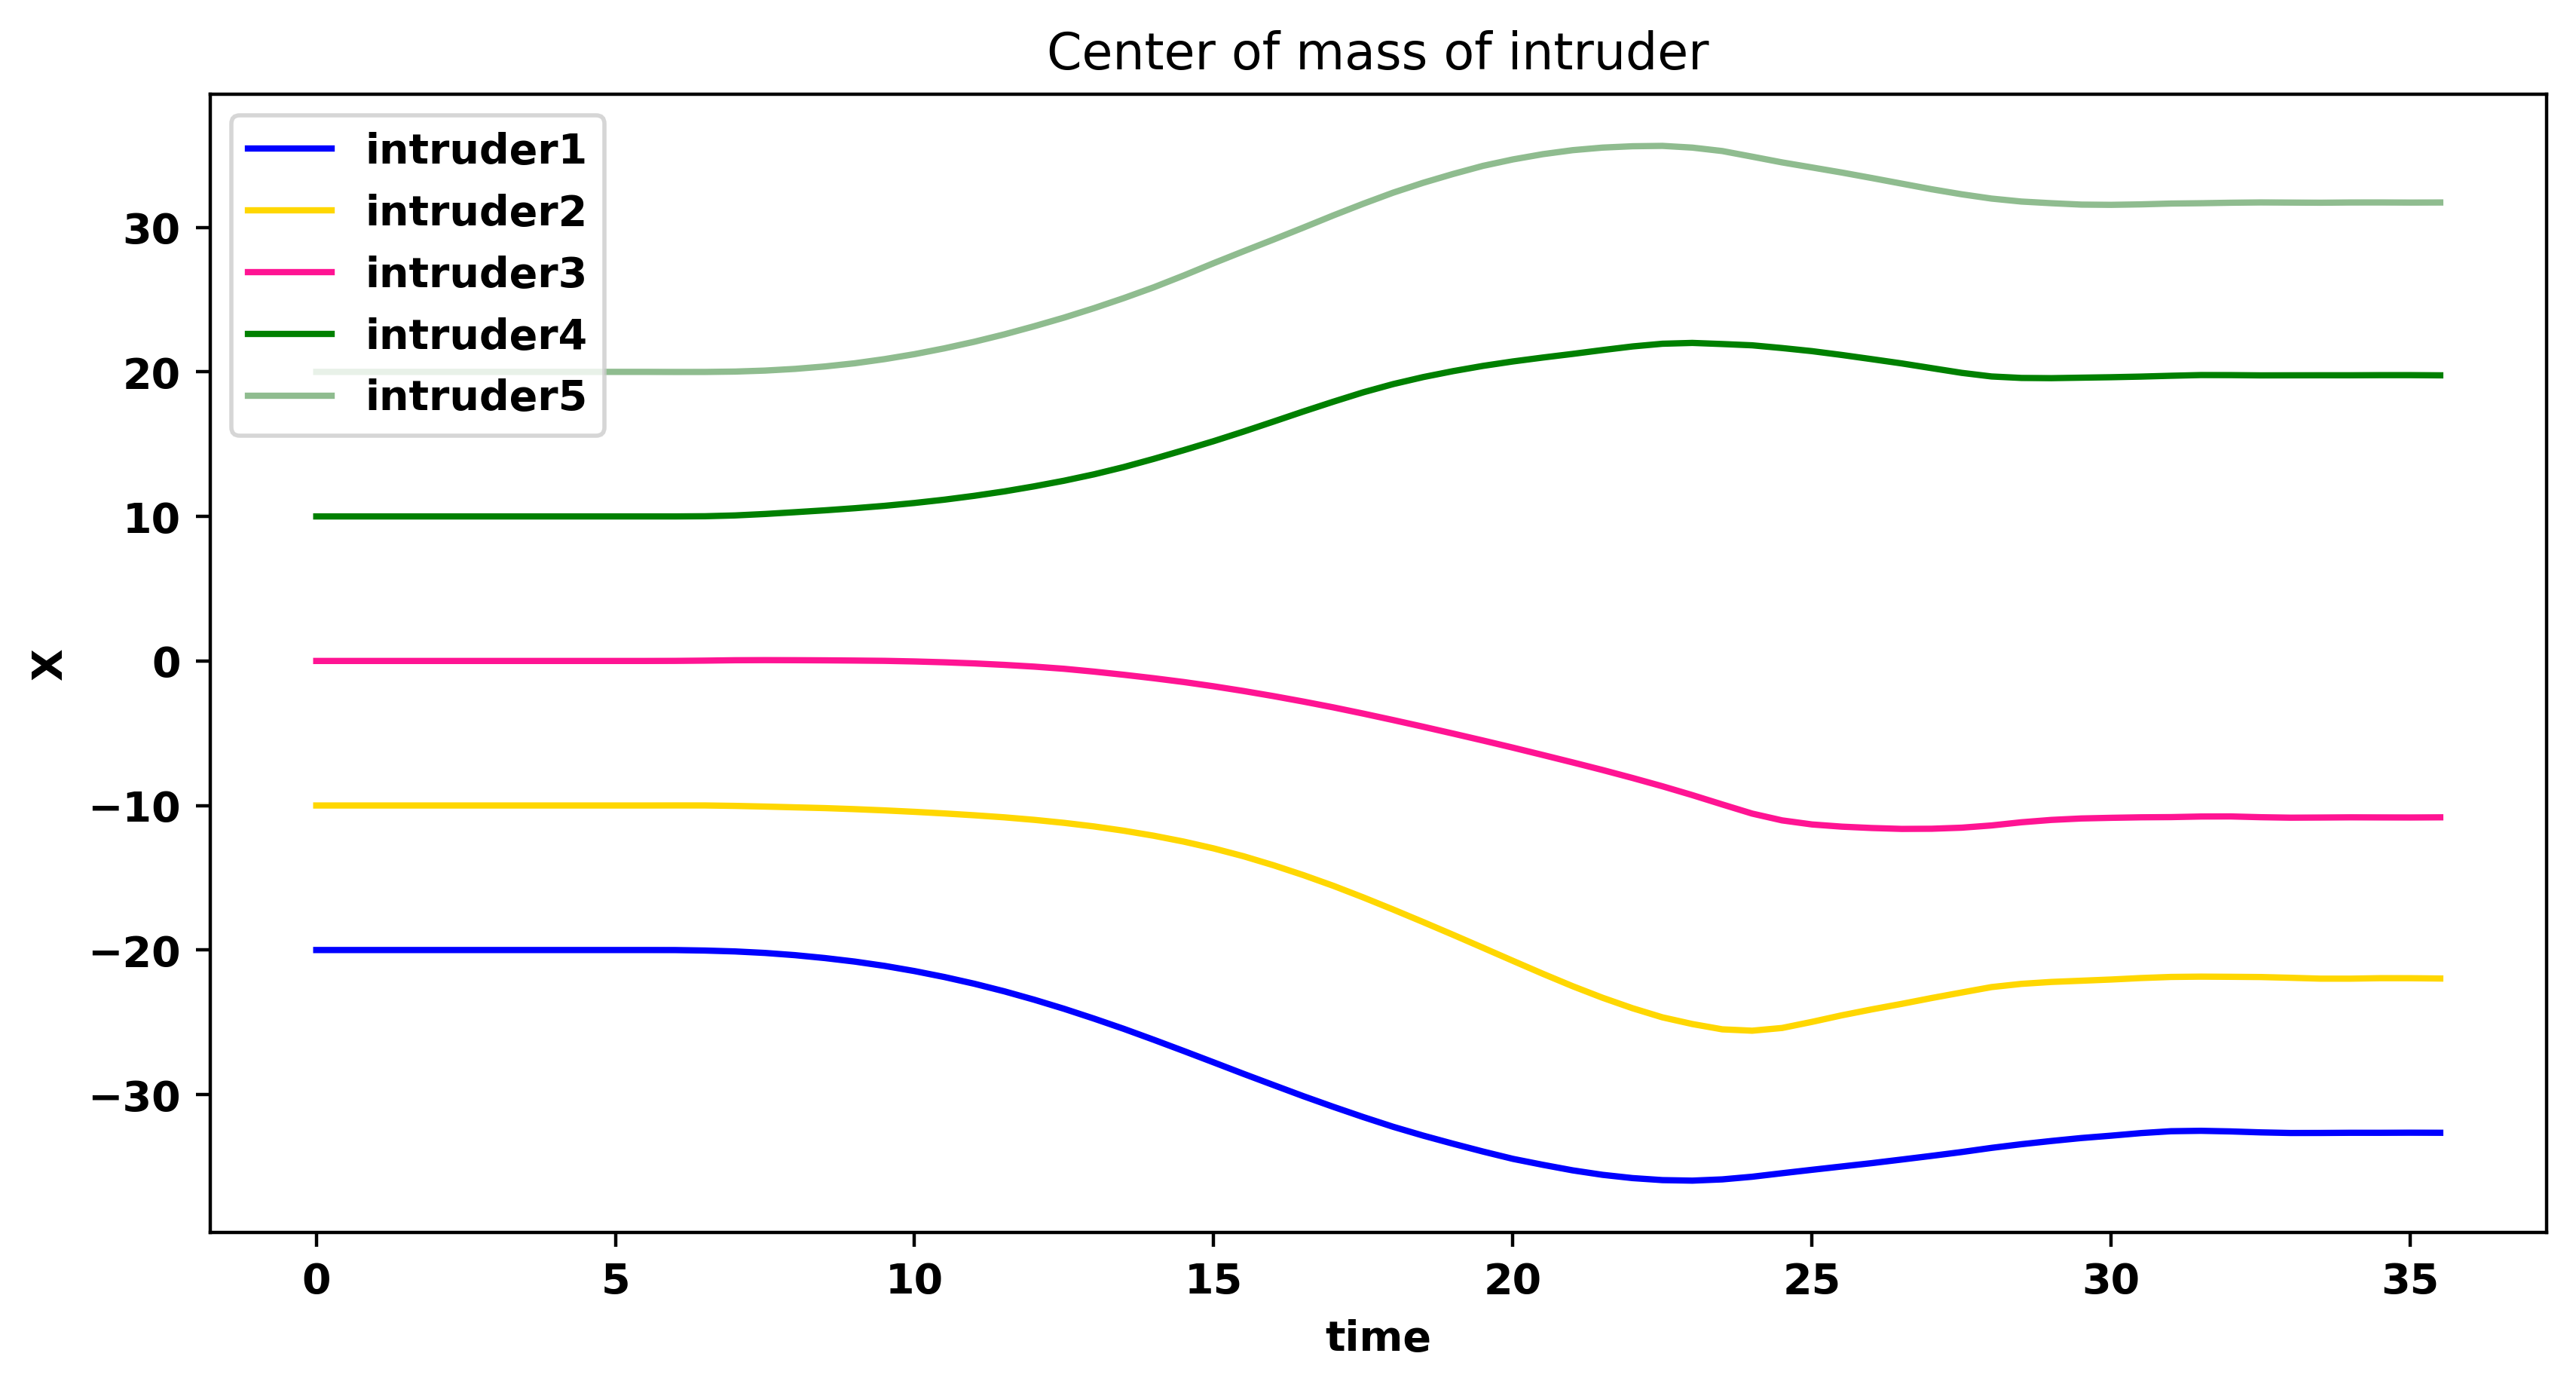

In [20]:
# x Vs time
plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,x_Arr1,label='intruder1',color='blue')
plt.plot(time_Arr,x_Arr2,label='intruder2',color='gold')
plt.plot(time_Arr,x_Arr3,label='intruder3',color='deeppink')
plt.plot(time_Arr,x_Arr4,label='intruder4',color='green')
plt.plot(time_Arr,x_Arr5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('X')
plt.legend()
plt.title('Center of mass of intruder')
plt.savefig('intruder x Vs time.svg',bbox_inches='tight')
plt.show()

In [21]:
orientation1 = []
orientation2 = []
orientation3 = []
orientation4 = []
orientation5 = []
for i in data1.index:
    instance1  = data1.loc[i]
    instance2  = data2.loc[i]
    instance3  = data3.loc[i]
    instance4  = data4.loc[i]
    instance5  = data5.loc[i]
    dely = (instance1[42477][1]-instance1[42473][1])
    delx = (instance1[42477][0]-instance1[42473][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation1.append(theta)
    
    dely = (instance2[42492][1]-instance2[42488][1])
    delx = (instance2[42492][0]-instance2[42488][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation2.append(theta)
    
    dely = (instance3[42507][1]-instance3[42503][1])
    delx = (instance3[42507][0]-instance3[42503][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation3.append(theta)
    
    dely = (instance4[42522][1]-instance4[42518][1])
    delx = (instance4[42522][0]-instance4[42518][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation4.append(theta)
    
    dely = (instance5[42537][1]-instance5[42533][1])
    delx = (instance5[42537][0]-instance5[42533][0])
    theta = np.arctan2(dely,delx)*180/np.pi
    orientation5.append(theta)
    

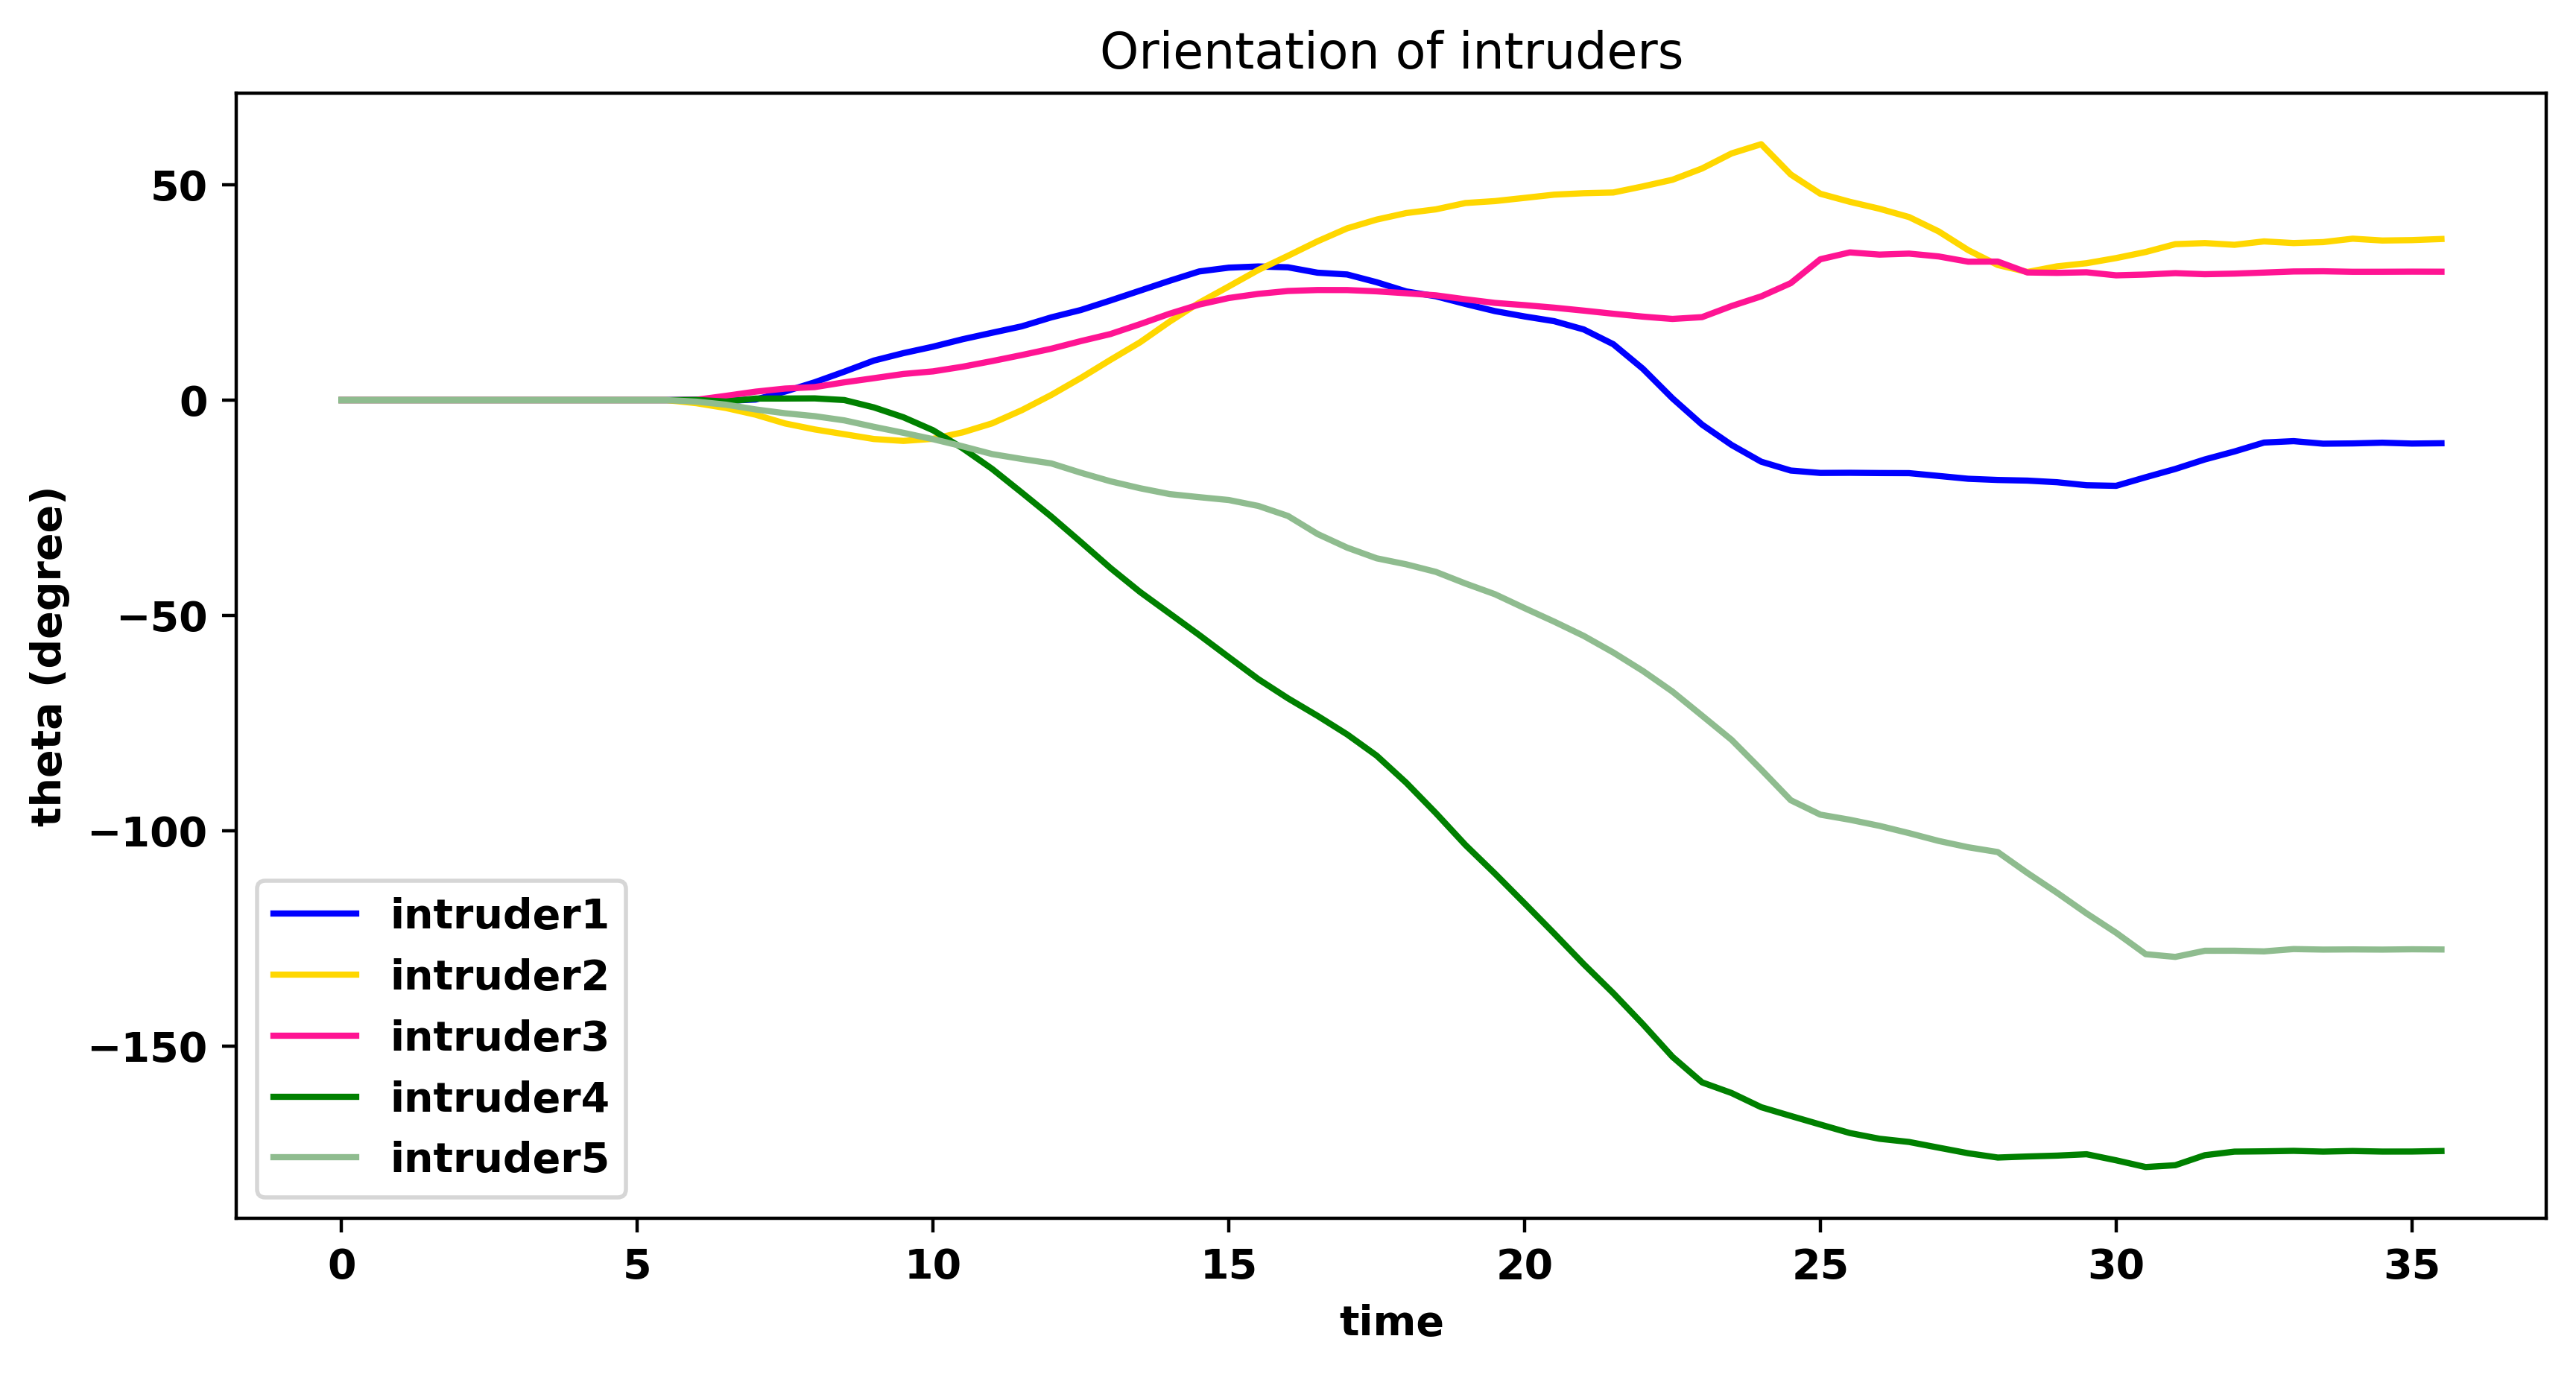

In [22]:
# theta Vs time
plt.figure(figsize=(10,5),dpi=400)
plt.plot(time_Arr,orientation1,label='intruder1',color='blue')
plt.plot(time_Arr,orientation2,label='intruder2',color='gold')
plt.plot(time_Arr,orientation3,label='intruder3',color='deeppink')
plt.plot(time_Arr,orientation4,label='intruder4',color='green')
plt.plot(time_Arr,orientation5,label='intruder5',color='darkseagreen')
plt.xlabel('time')
plt.ylabel('theta (degree)')
plt.title('Orientation of intruders')
plt.legend()
plt.savefig('orientation.svg',bbox_inches='tight')
plt.show()